# Исследовательский анализ развлекательного приложения 
# Procrastinate Pro+

##### Цель: 

Разобраться в причинах убыточности, несмотря на огромные вложения в рекламу и помочь компании выйти в плюс.

##### Задачи:

1. Подготовить данные к анализу.
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.
3. Провести исследовательский анализ данных.
4. Выяснить, как распределены траты на рекламу.
5. Оцените окупаемость рекламы.
6. Сделать выводы и дать рекомендации на основании проделанной работы.

### 1. Подготовка данных к анализу

Цели:
- загрузить данные
- корректировка баз данных для удобной работы с таблицами
- проверить на дубликаты, пропуски
- изменить тип данных при необходимости
- получить информацию о загруженных датасетах

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).


In [1]:
import pandas as pd

try:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    )
except:
    pass

Проверка датафрейма visits на пропуски, дубликаты, соответствие типов данных, оформление.

In [2]:
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

In [3]:
visits = visits.rename(columns={
'User Id': 'user_id', 
'Region': 'region',
'Device': 'device',
'Channel': 'channel',
'Session Start': 'session_start',
'Session End': 'session_end'
})
visits['session_start'] = pd.to_datetime(visits['session_start'], format="%Y.%m.%d %H:%M:%S")
visits['session_end'] = pd.to_datetime(visits['session_end'], format="%Y.%m.%d %H:%M:%S")
display(visits.head(5))

display(visits.info())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

In [4]:
visits.duplicated().sum()

0

Датафрейм visits приведен в порядок.

In [5]:
visits['device'].value_counts() # с каких устройств заходят пользователи

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [6]:
visits['region'].unique() # регионы пользователей

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [7]:
print(visits['channel'].unique()) #источники трафика  
len(visits['channel'].unique())

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


11

Проверка датафрейма orders на пропуски, дубликаты, соответствие типов данных, оформление.

In [8]:
display(orders.head(5))
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders = orders.rename(columns={
'User Id': 'user_id', 
'Event Dt': 'event_dt',
'Revenue': 'revenue'
})

orders['event_dt'] = pd.to_datetime(orders['event_dt'], format="%Y.%m.%d %H:%M:%S")
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

In [10]:
orders.duplicated().sum()

0

Датафрейм orders приведен в порядок.

In [11]:
orders['revenue'].describe() #информация по сумме заказа

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

Проверка датафрейма costs на пропуски, дубликаты, соответствие типов данных, оформление.

In [12]:
display(costs.head(5))
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
costs = costs.rename(columns={
'Channel': 'channel'
})
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y.%m.%d")
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

In [14]:
costs.duplicated().sum()

0

Датафрейм costs приведен в порядок.

In [15]:
print(costs['channel'].unique())
len(costs['channel'].unique())

['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


10

In [16]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

#### Вывод:
- изменены названия столбцов
- дубликаты - отсутствуют
- пропуски - отсутствуют
- изменены типы данных в столбцах dt, event_dt, session_start, session_end.

##### Так же:
  - в датафреймах имеются данные о пользователях из следующих стран: United States, UK, France, Germany;

  - среди устройств у пользователей - iPhone - 112603, Android - 72590, PC - 62686, Mac - 62022;

  - медиана заказов равна 5,37 единиц, min, 25%, 50%, 75% равны 4,99 - скорее всего стоимость месячной подписки;

  - источников привлечения трафика - 11, включая "органику": organic, TipTop, RocketSuperAds, YRabbit, FaceBoom, MediaTornado, AdNonSense, LeapBob, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds;

  - максимальная трата на маркетинг - 630, минимальная - 0.8

### 2 Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Цели: 
Задать функции для вычисления значений метрик
- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:
- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Момент анализа - 01.11.2019, а горизонт анализа - 14 дней. 

Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку за них оплаты нет.

In [17]:
from datetime import datetime, timedelta

Функция для расчёта удержания:

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    return result_raw, result_grouped 

Функция для визуализации удержания

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(12, 12))
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание неплатящих пользователей')
    ax3 = plt.subplot(2, 2, 3)
    
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика удержания платящих пользователей на {horizon} день')
 
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика удержания платящих пользователей на {horizon} день')
    plt.tight_layout()
    plt.show() 

Функция для расчёта конверсии

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

Функция для визуализации конверсии

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика удержания платящих пользователей на {horizon} день')

    plt.tight_layout()
    plt.show() 

Функция для расчёта LTV и ROI

In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, 
                            dims, 
                            horizon_days
    ):
    
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция сглаживания 

In [23]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации LTV и ROI

In [24]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика ROI пользователей на {horizon} день')

    plt.tight_layout()
    plt.show() 

##### Вывод:
Таким образом, были заданы следующие функции:
  - для расчета удержания
  - для визуализации удержания
  - для расчёта конверсии
  - для визуализации конверсии
  - для расчёта LTV и ROI
  - сглаживания 
  - для визуализации LTV и ROI

### 3 Исследовательский анализ данных

Цели:

- Составить профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

##### Создание пользовательских профилей

In [25]:
def get_profiles(sessions, orders, ad_costs):
    
    #делим на когорты
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format = "%Y-%m-%d") 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders["user_id"].unique()) # идентификатор платежеспособности
    
    #количество уникальных пользователей, с общей датой и источником привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index() 
    )
    
    #стоимость привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # за органику платить не нужно
    
    return profiles

In [26]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


##### 3.1 Определение минимальной и максимальной даты привлечения пользователей.

Доступный интервал привлечения пользователей:

In [27]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print(min_analysis_date, "\n", observation_date)

2019-05-01 00:00:00 
 2019-10-27 00:00:00


Минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года.

Сходится с ТЗ - по условию, имеются данные о пользователях привлечённых с 1 мая по 27 октября 2019 года.

##### 3.2 Региональная принадлежность платящего пользователя .

In [28]:
region = pd.DataFrame()
region['users'] = profiles.groupby('region')['user_id'].count()
region['%'] = ((region['users'] / profiles['region'].count()) * 100)
region.sort_values(by='%', ascending=False).style.format({'%': '{:.2f}%'})

,users,%
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Лвинная доля потока (2/3) из United States, 11-12% - из UK или France, около 10% из Germany.

In [29]:
#доля платящих:
region_pay = pd.DataFrame()
region_pay['users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_pay['%'] = ((region_pay['users'] / profiles.query('payer == True')['region'].count()) * 100)
region_pay.sort_values(by='%', ascending=False).style.format({'%': '{:.2f}%'})

,users,%
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


Платящие пользователи из United States - лидируют, меньше всего в Germany - менее 7%.

In [30]:
#% платящих пользователей:
result = pd.DataFrame()
result['users'] = profiles.groupby('region')['user_id'].count()
result['per'] = ((result['users'] / profiles['region'].count()) * 100)
result['pay_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
result['payer_per'] = ((result['pay_users'] / result['users']) * 100)
result.sort_values(by='per', ascending=False).style.format({'per': '{:.2f}%', 'payer_per': '{:.2f}%'})

,users,per,pay_users,payer_per
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Доля платящих пользователей из United States - 6,90%. Среди пользователей из UK платящих - 3,98%. Примерно такое же соотношение и для пользователей из France - 3,80%. Среди пользователей Germany платящие - 4,1%.

##### 3.3 Устройство платящего пользователя .

In [31]:
device = pd.DataFrame()
device['users'] = profiles.groupby('device')['user_id'].count()
device['%'] = ((device['users'] / profiles['device'].count()) * 100)
device.sort_values(by='%', ascending=False).style.format({'%': '{:.2f}%'})

,users,%
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


In [32]:
device_pay = pd.DataFrame()
device_pay['pay_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_pay['%'] = ((device_pay['pay_users'] / profiles.query('payer == True')['device'].count()) * 100)
device_pay.sort_values(by='%', ascending=False).style.format({'%': '{:.2f}%'})

,pay_users,%
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


##### 3.4 Определение рекламных каналов, из которых пришло больше всего платящих пользователей.

In [33]:
result = pd.DataFrame()
result['users'] = profiles.groupby('device')['user_id'].count()
result['per'] = ((result['users'] / profiles['device'].count()) * 100)
result['pay_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
result['payer_per'] = ((result['pay_users'] / result['users']) * 100)
result.sort_values(by='per', ascending=False).style.format({'per': '{:.2f}%', 'payer_per': '{:.2f}%'})

,users,per,pay_users,payer_per
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Доля платящих пользователей для устройства Mac: 6,36%.

Среди пользователей iPhone доля платящих равна 6,21%. 

Для пользователей Android - 5,85%. 

Пользователей PC платящих меньше всего - 5,05%.

In [34]:
channel_share = pd.DataFrame()
channel_share['users'] = profiles.groupby('channel')['user_id'].count()
channel_share['%'] = ((channel_share['users'] / profiles['channel'].count()) * 100)

channel_share.sort_values(by='%', ascending=False).style.format({'%': '{:.2f}%', 'payer_per': '{:.2f}%'})

,users,%
channel,,
organic,56439,37.62%
FaceBoom,29144,19.43%
TipTop,19561,13.04%
OppleCreativeMedia,8605,5.74%
LeapBob,8553,5.70%
WahooNetBanner,8553,5.70%
RocketSuperAds,4448,2.97%
MediaTornado,4364,2.91%
YRabbit,4312,2.87%


In [35]:
result = pd.DataFrame()
result['users'] = profiles.groupby('channel')['user_id'].count()
result['per'] = ((result['users'] / profiles['channel'].count()) * 100)
result['pay_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
result['payer_per'] = ((result['pay_users'] / result['users']) * 100)
result.sort_values(by='per', ascending=False).style.format({'per': '{:.2f}%', 'payer_per': '{:.2f}%'})

,users,per,pay_users,payer_per
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Большинство платящих пользователей приходится на  FaceBoom - 12,20%, AdNonSense - 11,34% и lambdaMediaAds - 10,47%. 

Менее всего конвертируются пользователи из каналов organic - 2,06%, OppleCreativeMedia - 2,71% и LeapBob - 3,06%.

#### Вывод

На данном этапе были сформированы профили пользователей и определены минимальная - 2019-05-01 и максимальная даты привлечения пользователей - 2019-10-27.

Построена таблица, отражающую количество пользователей и их долю из каждой страны. 

Изучены платящие пользователи и их долю из каждой страны. 

Было изучено, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи. 

Больше всего доля платящих пользователей для устройства Mac:  
  - Доля платящих пользователей для устройства Mac: 6,36%.
  - Среди пользователей iPhone доля платящих равна 6,21%.
  - Для пользователей Android - 5,85%.
  - Пользователей PC платящих меньше всего - 5,05%.
                                                              
Исследованы рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей. 

Большинство платящих пользователей приходится на FaceBoom - 12,20%, AdNonSense - 11,34% и lambdaMediaAds - 10,47%.
Менее всего конвертируются пользователи из каналов organic - 2,06%, OppleCreativeMedia - 2,71% и LeapBob - 3,06%.

### 4 Маркетинг
Цели:
- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

##### 4.1 Общая сумма расходов маркетинг

In [36]:
import math

In [37]:
display(round(costs['costs'].sum(), 1))

105497.3

Сумма, потраченная на маркетинг - 105497.3

In [38]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Среднее значение - 58,61, медиана - 12,285

##### 4.2 Распределение трат по рекламным источникам

In [39]:
channel_distribution = pd.DataFrame()
channel_distribution['costs'] = costs.groupby('channel')['costs'].sum()
channel_distribution['ratio'] = ((channel_distribution['costs'] / costs['costs'].sum()) * 100)
channel_distribution.sort_values(by='ratio', ascending=False)

,costs,ratio
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Больше всего вложено ресурсов в сервис TipTop - 54751,3, что составляет 51,9% всей маркетинговой компании.

##### 4.3 Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

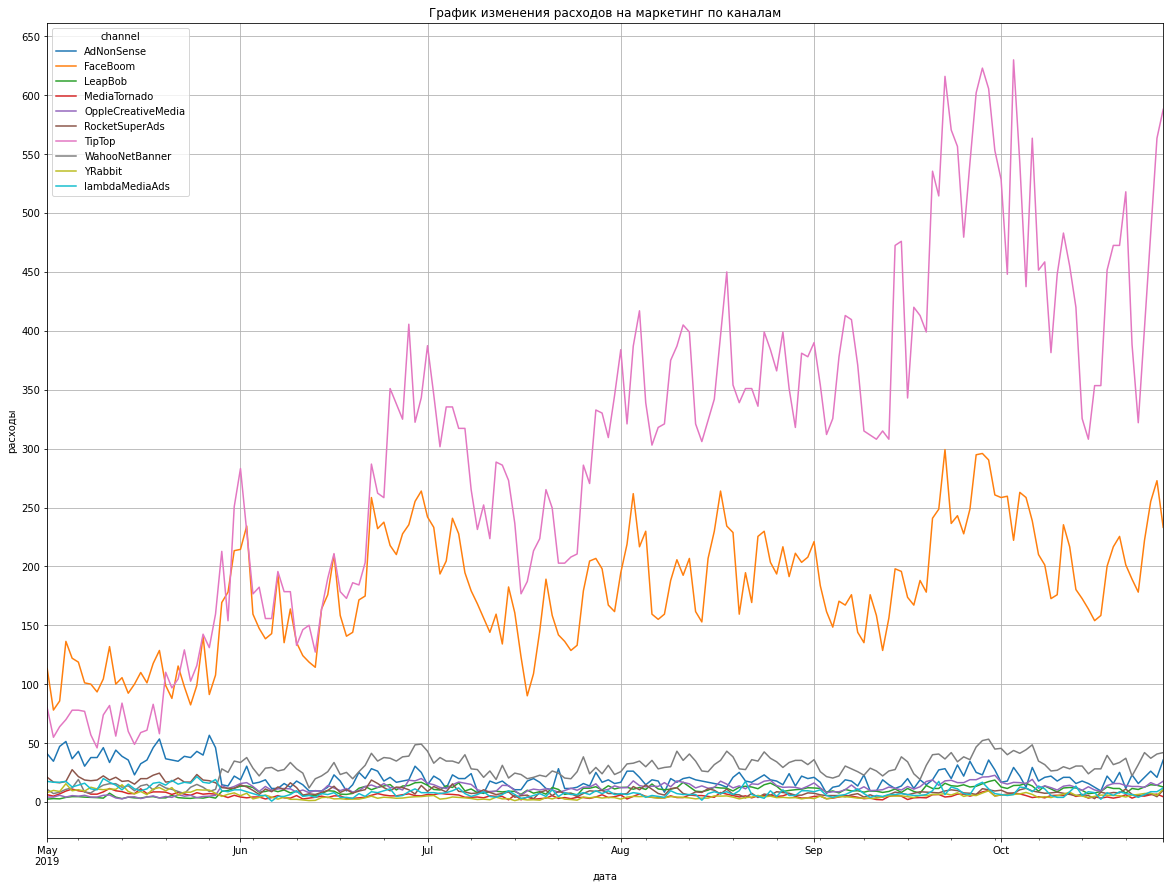

In [41]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(20, 15), 
           grid=True,        
           label='channels',                     
           legend=True

) 

plt.yticks(np.arange(0, 700, 50))
plt.title('График изменения расходов на маркетинг по каналам')
plt.xlabel('дата')
plt.ylabel('расходы')
plt.show()

В основном, все расходы приходят на два канала: TipTop и FaceBoom. По сравнению с ними, другие каналы обходятся очень дешево.

Среднее значение MAU - 28989 пользователей, медиана - 29087 пользователей. Видим рост аудитории начина с июня ~ 26000 пользователей и до сентября - почти 32000 пользователей в месяц. К октябрю MAU стал немного падать - к 31000.

In [42]:
#costs

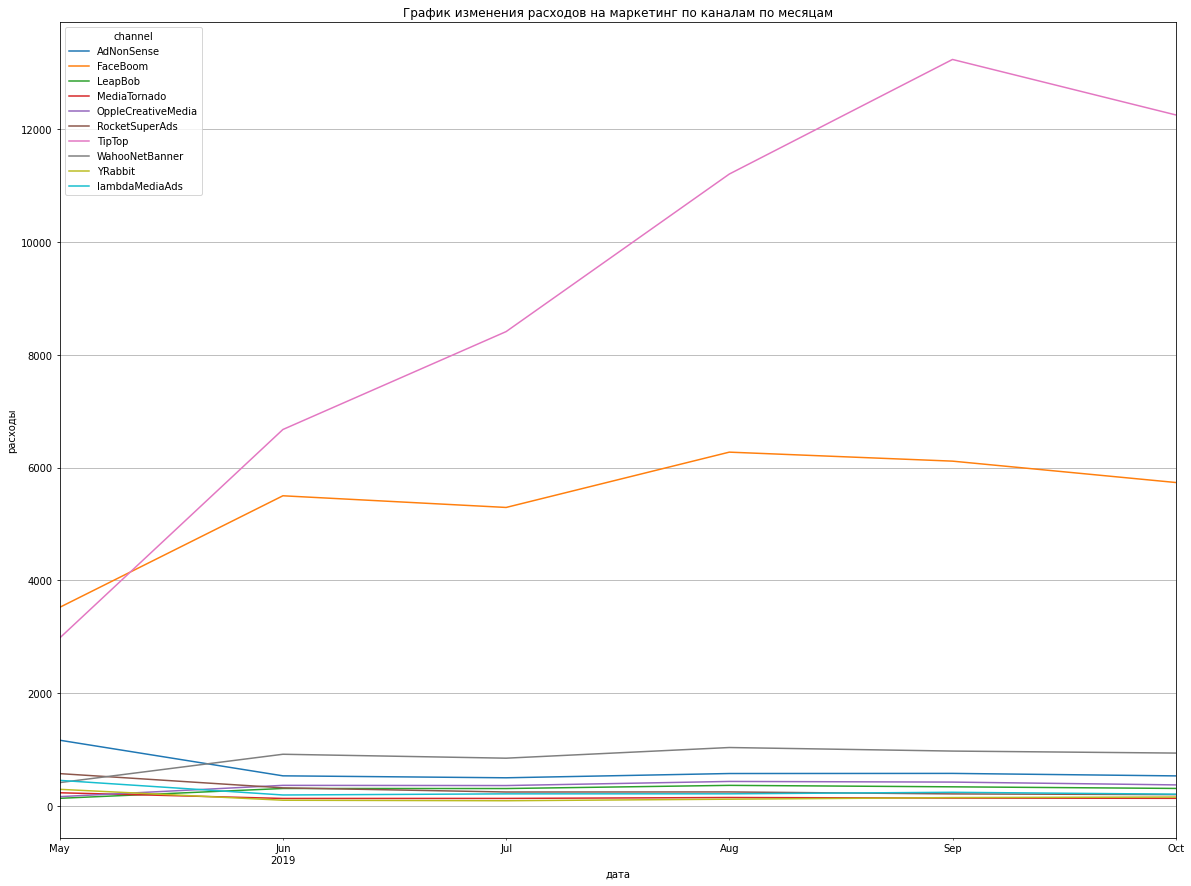

In [43]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

filtered_data = costs.pivot_table(
        index='dt_month', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(20, 15), 
           grid=True,        
           label='channels',                     
           legend=True

) 

plt.title('График изменения расходов на маркетинг по каналам по месяцам')
plt.xlabel('дата')
plt.ylabel('расходы')
plt.show()

FaceBoom и TipTop явно находятся в лидерах по вливанию маркетинговых средств на протяжении май-октябрь, но на второго агрегатора расходы все время повышались - будто ставка была сделана имено в этом направлении.

##### 4.4 САС каждого источника

In [44]:
#visits.groupby('visit_month')['user_id'].nunique().describe()

In [45]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [46]:
profiles['acquisition_cost'].describe()

count    150008.000000
mean          0.703278
std           0.954097
min           0.000000
25%           0.000000
50%           0.247500
75%           1.108943
max           3.715385
Name: acquisition_cost, dtype: float64

Медиана - 0,24, среднее - 0,7, максимальная стоимость привлечения клиента - 3,7

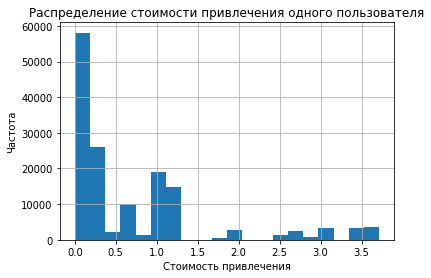

In [47]:
profiles['acquisition_cost'].hist(bins=20)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

Pазницa между медианой и средним оказывает влияние большое число нулевой стоимости пользователей.

In [48]:
channel_cac = pd.DataFrame()
channel_cac['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
channel_cac.sort_values(by='acquisition_cost_mean', ascending=False)

,acquisition_cost_mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самый дорогой трафик от TipTop - 2,8, от остальных каналов привлечения новые пользователи обходятся куда дешевле: от 0,2 до 1,1.

##### Вывод

  - Сумма, потраченная на маркетинг - 105497.3.

  - Среднее значение - 58,61, медиана - 12,285.

  - Больше всего вложено ресурсов в сервис TipTop - 54751,3, что составляет 51,9% всей маркетинговой компании.

  - В основном, все расходы приходят на два канала: TipTop и FaceBoom. По сравнению с ними, другие каналы обходятся очень дешево.

  - Медиана - 0,24, среднее - 0,7, максимальная стоимость привлечения клиента - 3,7.

  - Pазницa между медианой и средним оказывает влияние большое число нулевой стоимости пользователей.

  - Самый дорогой трафик от TipTop - 2,8.

###  5 Оценка окупаемости рекламы

Цели:
- Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверка конверсии пользователей и динамики её изменения. Удержание пользователей.
- Анализ окупаемости рекламы с разбивкой по устройствам. 
- Анализ окупаемости рекламы с разбивкой по странам. 
- Анализ окупаемости рекламы с разбивкой по рекламным каналам. 

##### 5.1  Рассчит и визуализация LTV и ROI

In [49]:
#исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа - 2 недели по условию

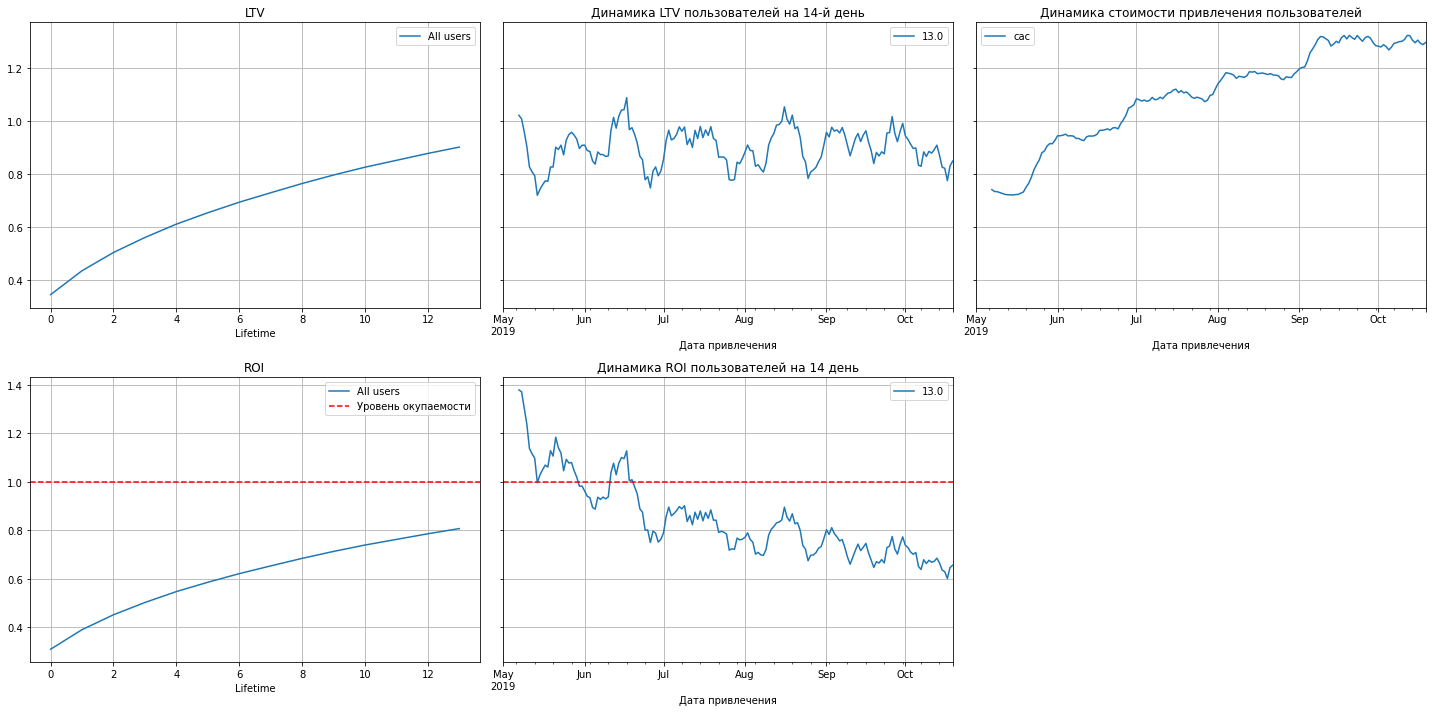

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

  - CAC неустойчив, рекламный бюджет увеличивается с течением времени.
  - На LTV стабильно расходится в пределах одних и тех же значений.
  - ROI падает.

##### 5.2 Анализ окупаемости рекламы с разбивкой по устройствам.

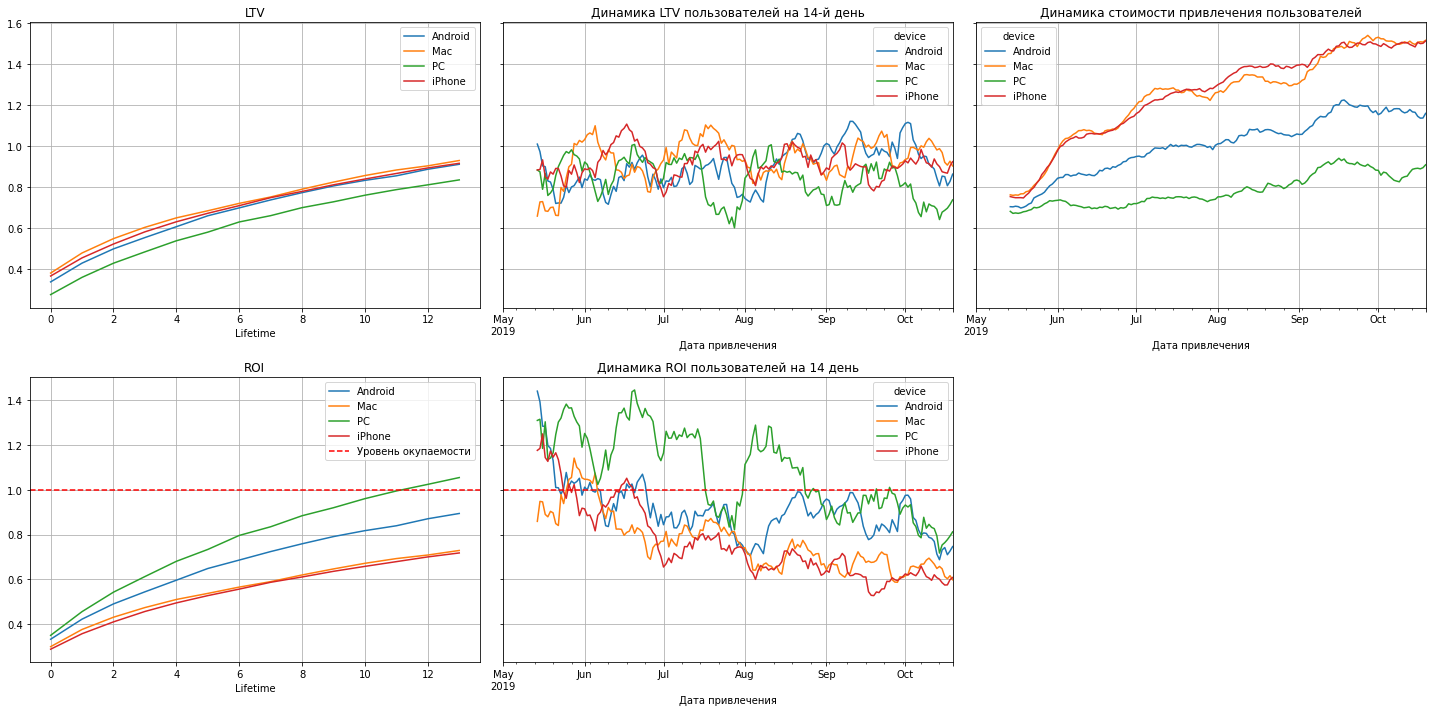

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи всех устройств окупались до июня, а потом что-то пошло не так. В сентябре ROI пользователей PC на 14 день был на грани окупаемости. ROI всех остальных устройств был уже ниже уровня начиная с июня. Стоимость пользователей устройств PC самая низкая, а ROI - выше остальных. 

In [52]:
visits['visit_day'] = pd.to_datetime(visits['session_start'], format="%Y-%m-%d")

функция для расчёта удержания

In [53]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

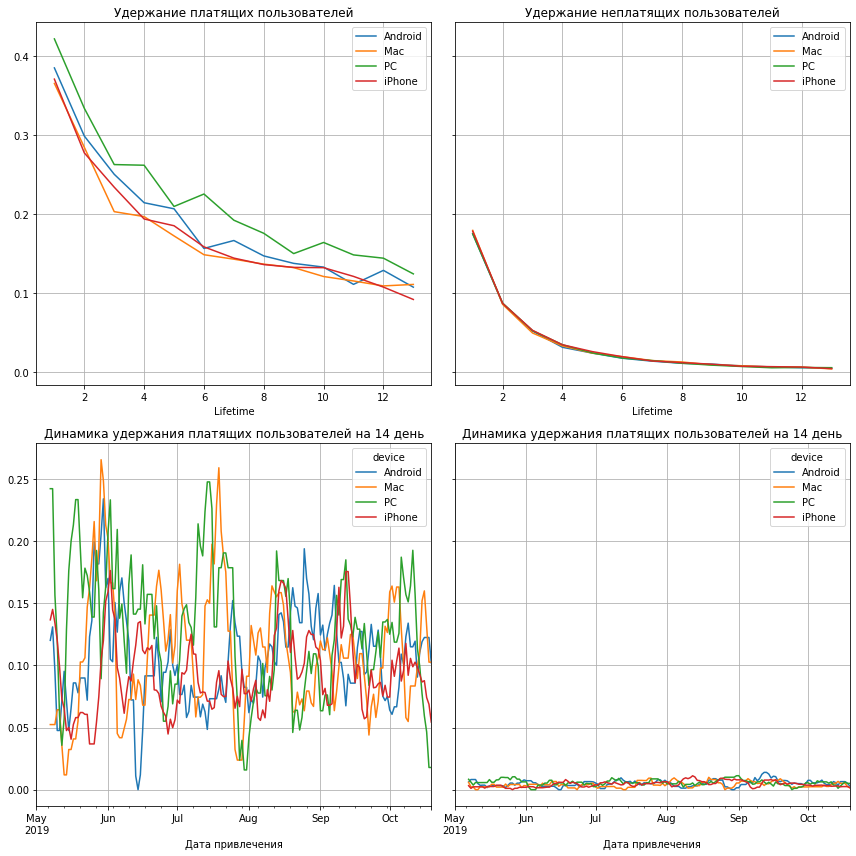

In [54]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC.

##### 5.3 Анализ окупаемости рекламы с разбивкой по странам.

окупаемость с разбивкой по странам

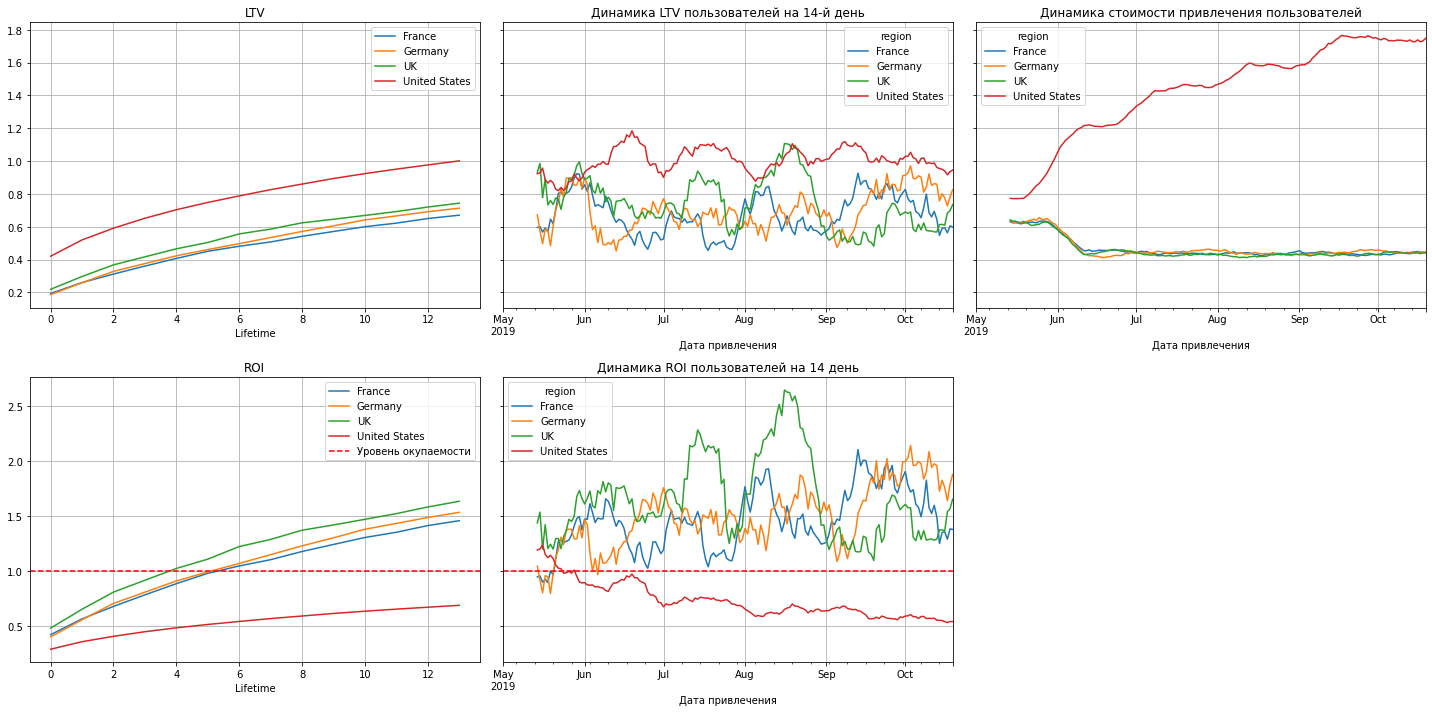

In [55]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:

1. Реклама не везде окупается. В United States (основная аудитория) уровень окупаемости рекламы низкий.
2. Cтоимость привлечения пользователей из United States - самая высокая, так же она растет.
3. LTV держится в одних и тех же значениях - стабилен.
4. Лучше всего окупается UK и Germany. 
Oкупаемость пользователей начала падать с конца июня 2019 года!

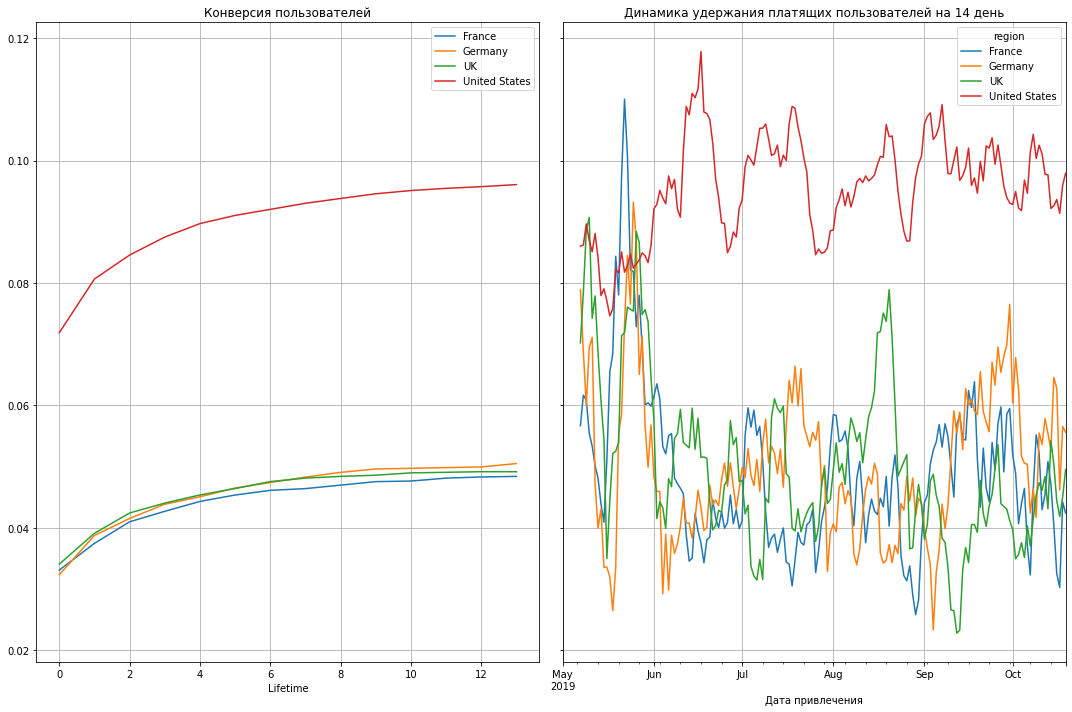

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Слабая конверсия у пользователей из UK, Germany и France.

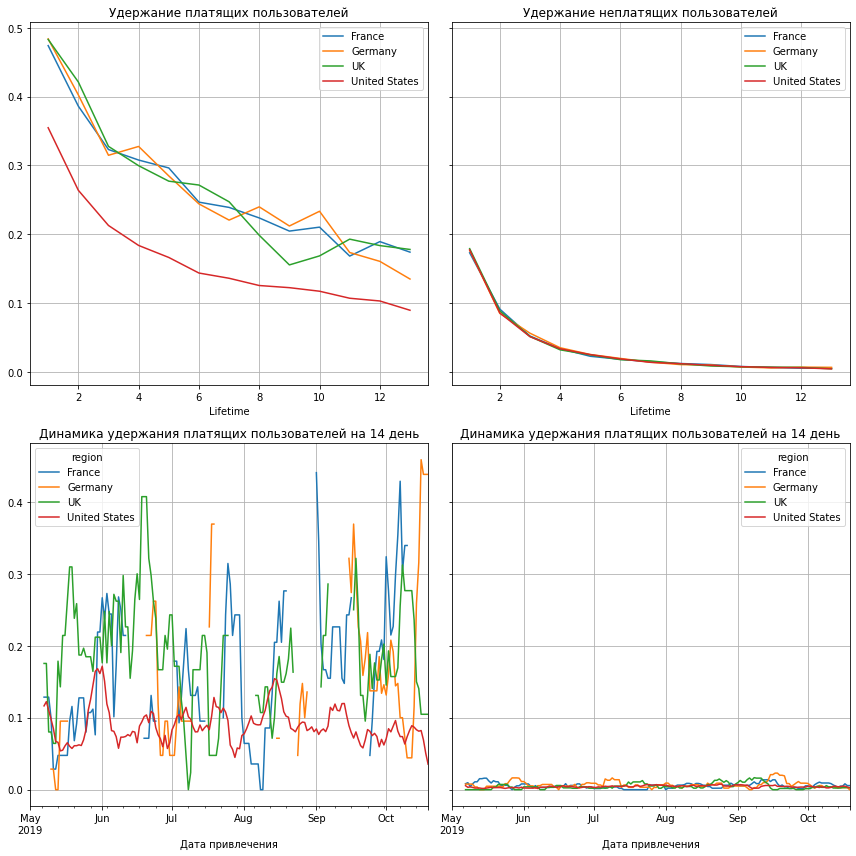

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Значение удержания пользователей в Unated States очень низкие.

##### 5.4 Анализ окупаемости рекламы с разбивкой по рекламным каналам.

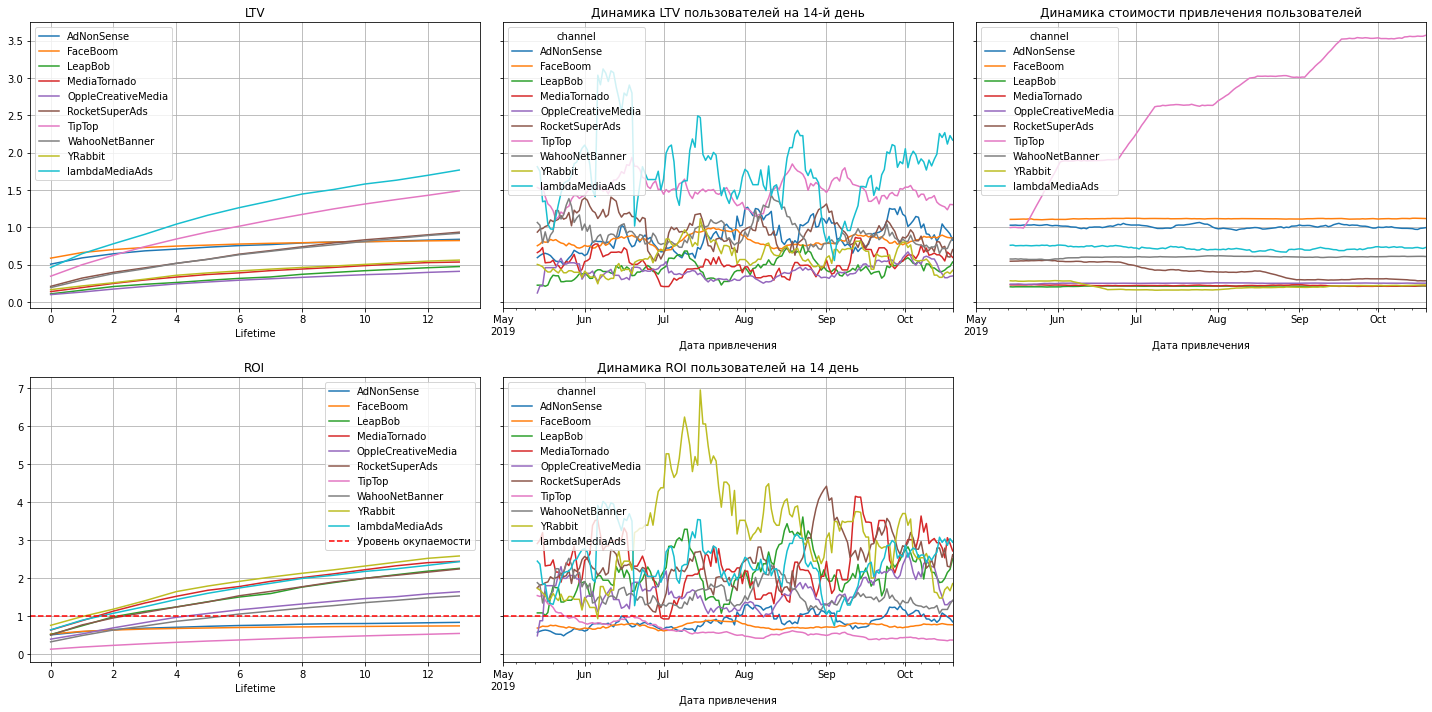

In [58]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Есть большой рост стоимости привлечения пользователей из рекламного канала TipTop. Скорее всего было потрачено больше ресурсов на эту рекламную сеть.

Не окупаются пользователи от каналов LeapBop, FaceBoom, TipTop.

Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

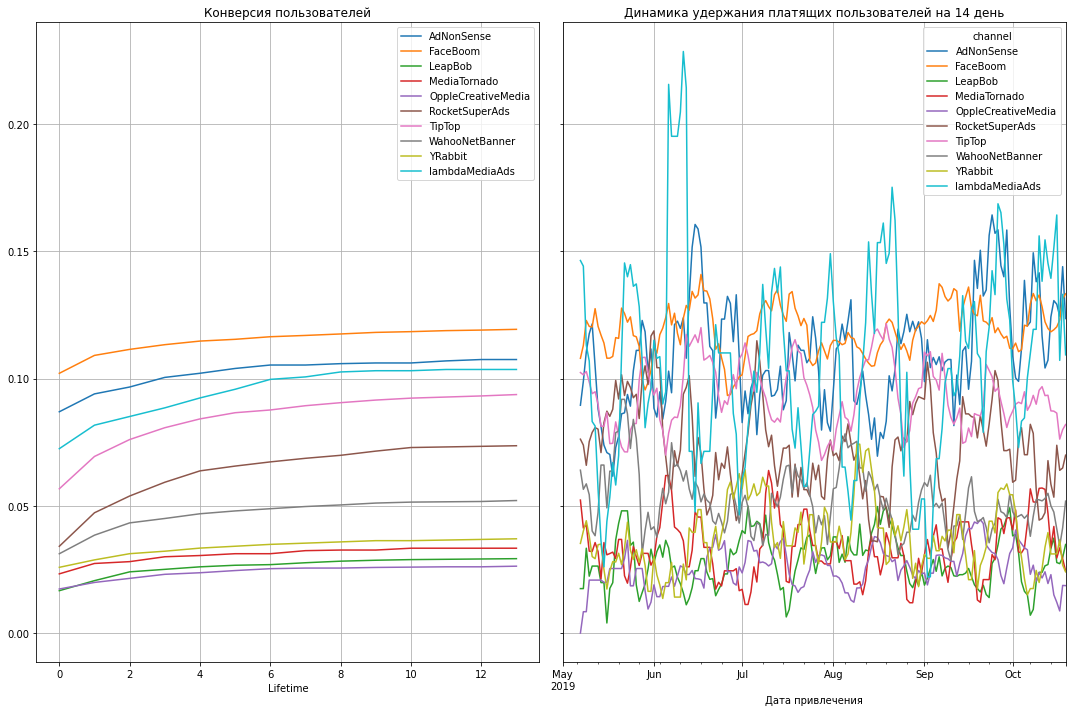

In [59]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

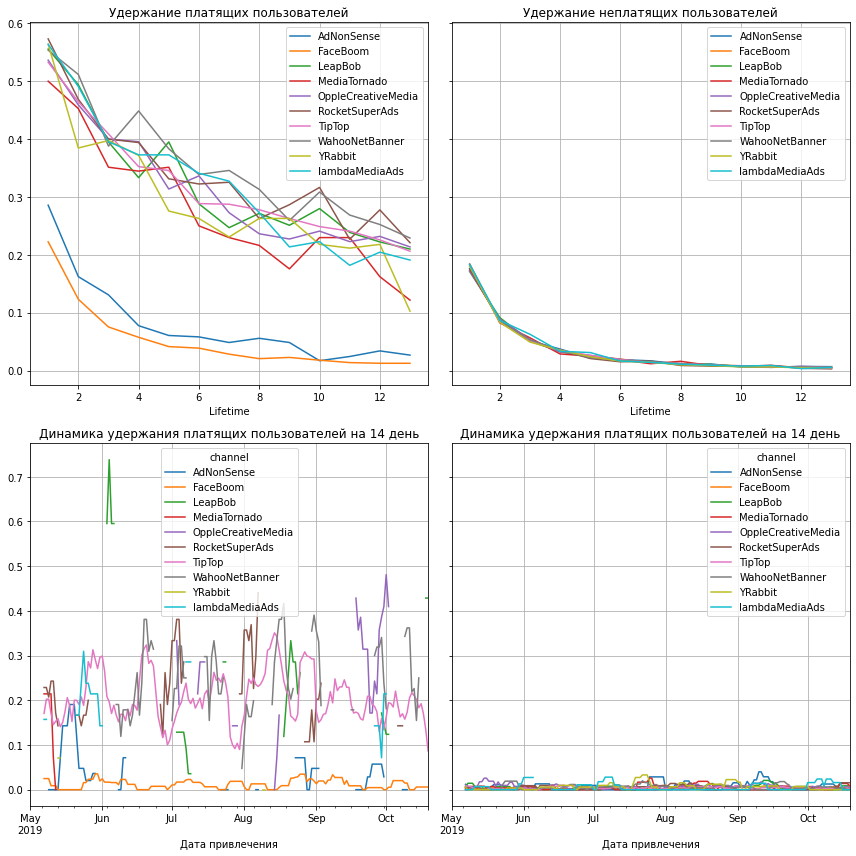

In [60]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

##### Вывод

- Реклама близка к окупемости, по задаче - пользователи должны окупаться не позднее чем через две недели после привлечения. - - - Реклама почти окупается к концу 2й недели. ROI около 80%
- Окупаемость снижают владельцы Mac и iPhone, страна - Unated States. 
- Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.

Явная причина неокупаемости - неравномерное распределением средств на рекламу.

### 6 Bыводы

Оценена окупаемость рекламы. Рассчитан и визуализирован LTV и ROI. 

По графикам сделаны следующие выводы:

- ожидания окупаемости к концу второй недели не оправданы. ROI ~ 80%.
- Рекламный бюджет увеличивается с течением времени.
- LTV стабилен. 
- ROI падает.

##### Причины неэффективности привлечения пользователей - Разбивка по устройствам.

- Пользователи всех устройств окупались до июня, особенно для владельцев Mac и Iphone. 
- К сентябрю ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня.
- Стоимость привлечения пользователей PC самая низкая, а ROI самая высокая.

##### Рекомендации для отдела маркетинга для повышения эффективности - Разбивка по устройствам.

Обратить внимание стоит на владельцев Mac и iPhone - стоимость их привлечения высока и растет, а окупаемоcть - нет!

Пользователи Mac, Android и iPhone конвертируются неплохо, скорее всего, дело в удержании. Неплатящие пользователи удерживаются плохо, а из платящих лучше всего удерживаются пользователи PC, хуже удерживаются пользователи iPhone и Mac.

##### Причины неэффективности привлечения пользователей - Разбивка по странам.

- В Unated States уровень окупаемости рекламы низкий, несмотря на то, что они являются основной аудиторией.
- Самая высокая стоимость привлечения пользователей из Unated States.
- LTV стабилен.

##### Рекомендации для отдела маркетинга для повышения эффективности  - Разбивка по странам.

Необходимо направить внимание на пользователей из Unated States!

Увеличение удержания пользователей из Unated States.

Увеличение конверсии у пользователей из остальных стран, и так же их доля среди всех пользователей.

##### Причины неэффективности привлечения пользователей - Разбивка по каналам

Рост стоимости привлечения пользователей из рекламного канала TipTop! 

Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

##### Рекомендации для отдела маркетинга для повышения эффективности  -Разбивка по каналам

Не стоит делать ставку на трафик с одного канала, а распределять бюджет умеренно, по всем источникам.

Для пользователей из США в целом уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из Америки - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США. Причем окупаемость пользователей начала падать с конца июня 2019 года - стоит также разобраться, что могло послужить причиной.

In [64]:
profiles_usa = profiles.query('region == "United States"')
profiles_usa

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


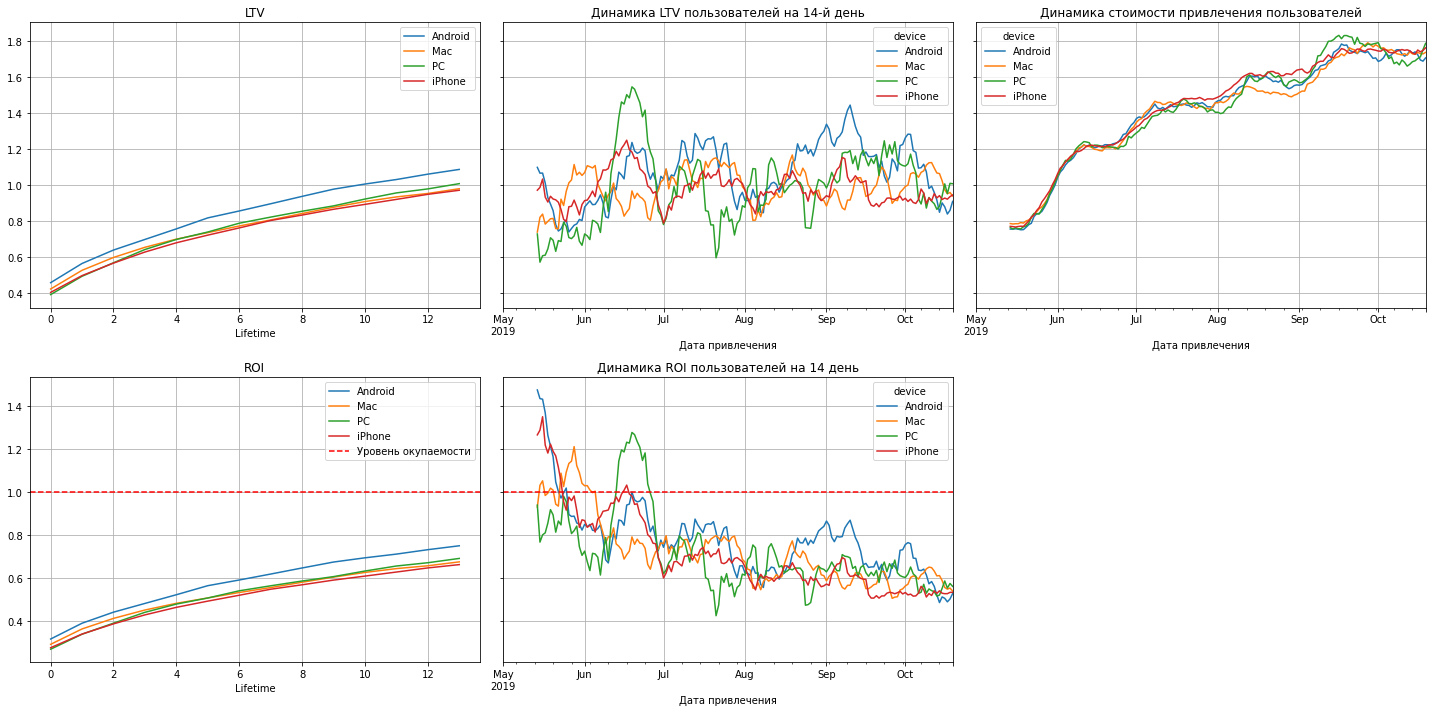

In [65]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

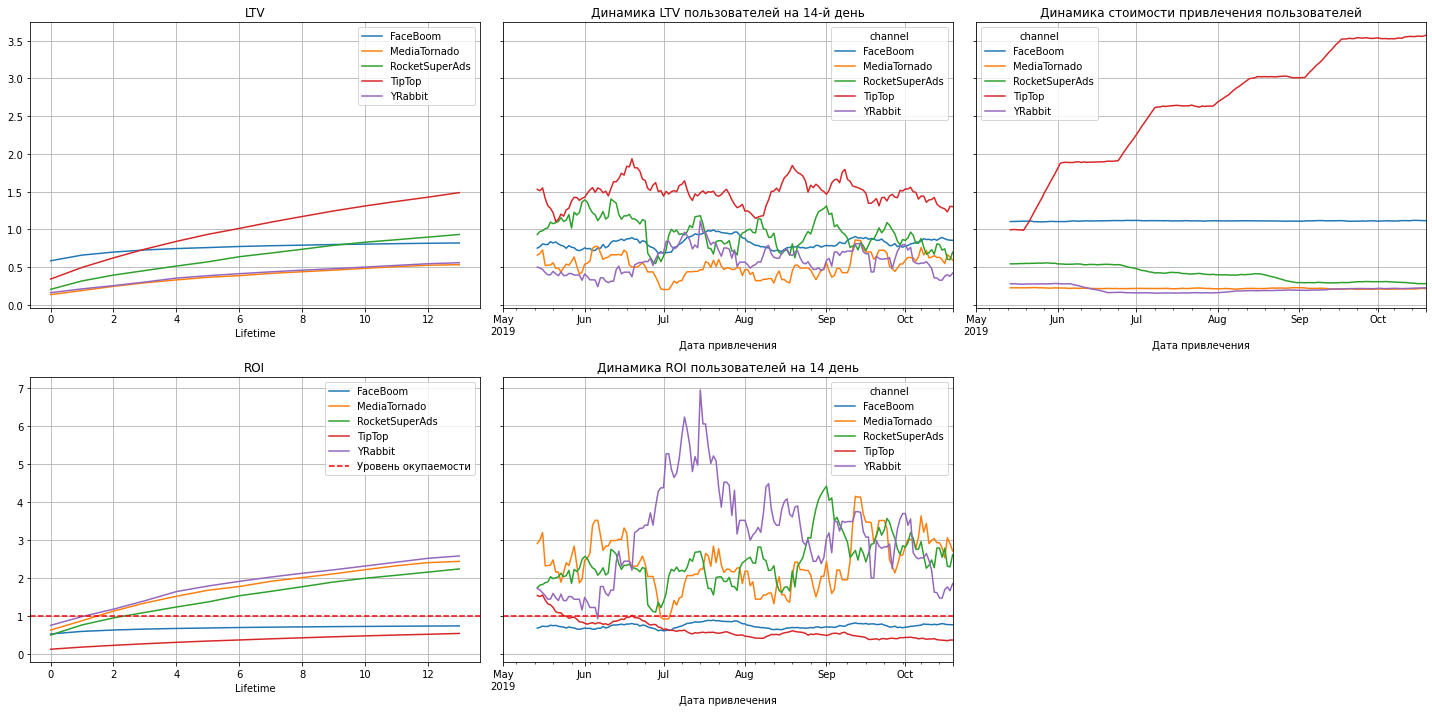

In [66]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 